# Laboratory practice № 3 (forced movement)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np

In [2]:
dt = 0.001

In [3]:
color = ["b", "g", "r"]

## Task 1

Mode pairs: 

5. neutral & time proportional
6. conservative modes
7. pair of stable oscillating modes


In [4]:
a_1 = sympy.Symbol("a_1")
a_0 = sympy.Symbol("a_0")
lambdas = [
    [0, 0],
    [sympy.I, -sympy.I],
    [-1 + sympy.I, -1 - sympy.I]
]

In [5]:
sols = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a_1,l[0]*l[1] -a_0],a_1,a_0)
    sols.append([float(sol[a_1]), float(sol[a_0])])
    print("Solutions:",*sols[-1])

Solutions: 0.0 0.0
Solutions: 0.0 1.0
Solutions: 2.0 2.0


In [6]:
y = sympy.Function("y")
t = sympy.Symbol("t")

In [7]:
sympy.dsolve(y(t).diff(t,2)+sols[0][0]*y(t).diff(t) + sols[0][1]*y(t), 0)

Eq(y(t), C1 + C2*t)

In [8]:
sympy.dsolve(y(t).diff(t,2)+sols[1][0]*y(t).diff(t) + sols[1][1]*y(t), 0)

Eq(y(t), C1*sin(t) + C2*cos(t))

In [9]:
sympy.dsolve(y(t).diff(t,2)+sols[2][0]*y(t).diff(t) + sols[2][1]*y(t), 0)

Eq(y(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(-1.0*t))

In [10]:
transferFunction_1_1 = ctrl.tf([1.], [1., *sols[0]])
transferFunction_1_2 = ctrl.tf([1.], [1., *sols[1]])
transferFunction_1_3 = ctrl.tf([1.], [1., *sols[2]])

In [11]:
state_space_1_1, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_1), form="reachable")
state_space_1_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_2), form="reachable")
state_space_1_3, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_3), form="reachable")

In [12]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1_1 = np.ones_like(time_1)*2.5
u_1_2 = 0.5 * time_1
u_1_3 = np.cos(time_1)

In [13]:
init_state_1_1 = [0,-1]
init_state_1_2 = [0,0]
init_state_1_3 = [0,1]

In [14]:
us = ["2.5", "0.5t", "\cos(t)"]
is_ = ["-1", "0", "1"]

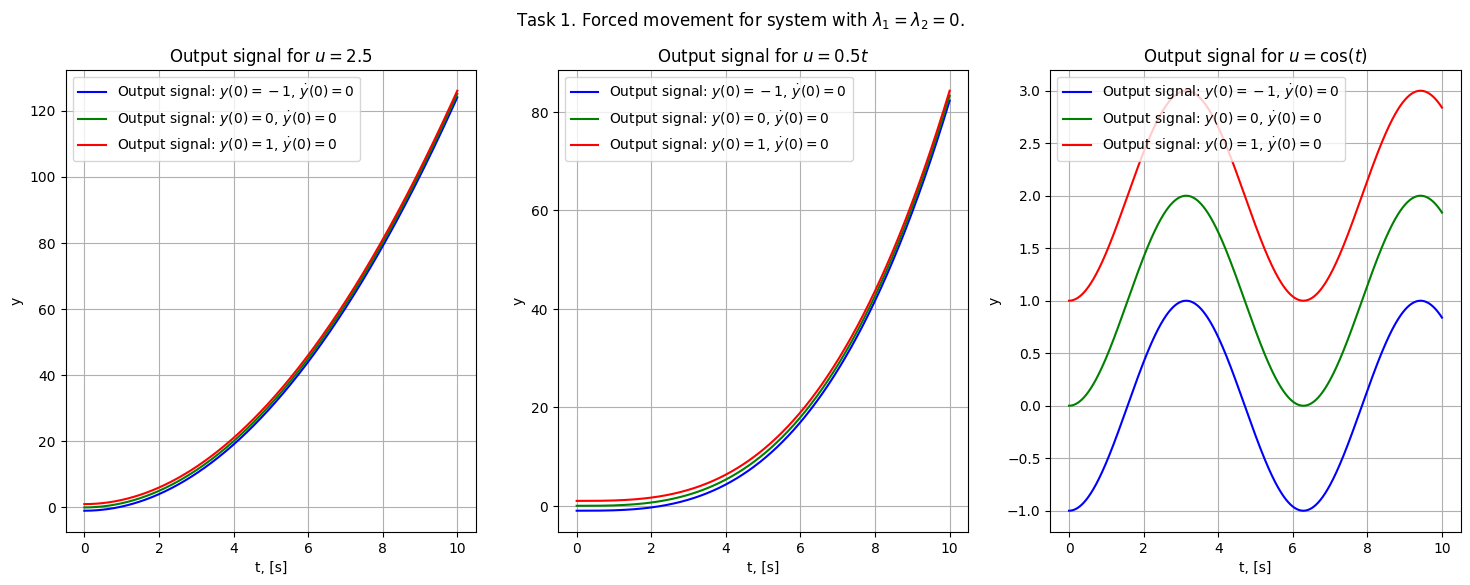

In [15]:

y_1_1 = [[], [], []]
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 = \lambda_2 = 0$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_1[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

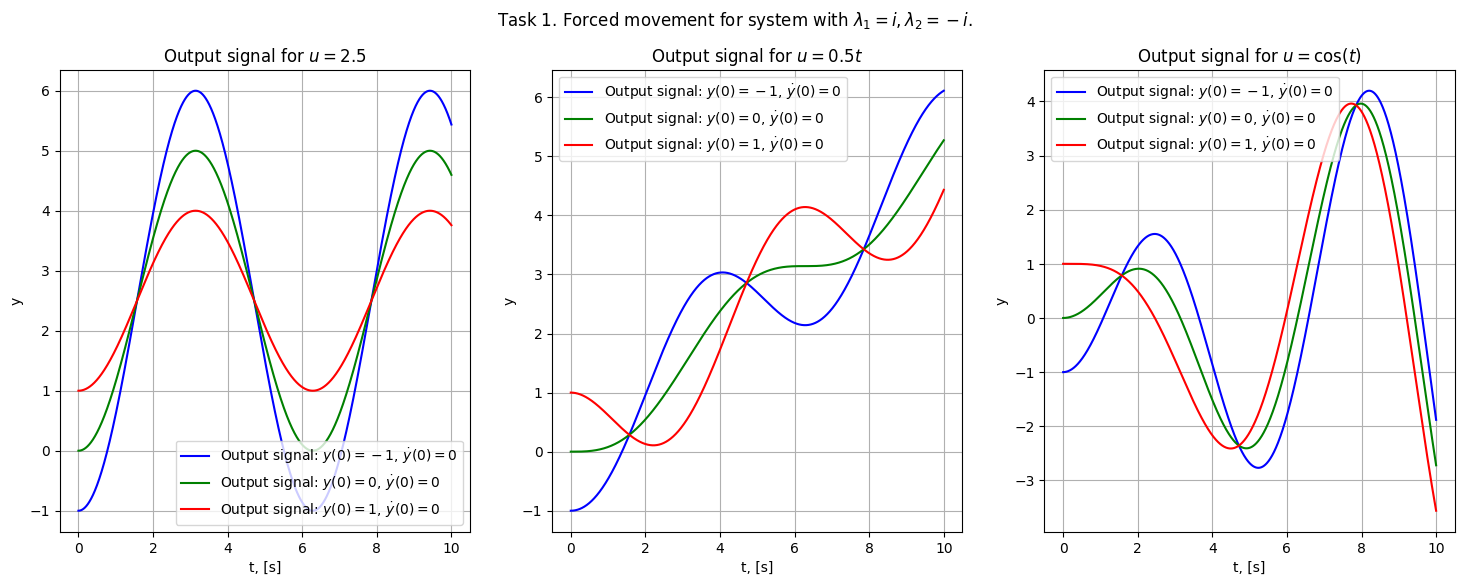

In [16]:
y_1_2 = [[], [], []]
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_2[0].append(ctrl.forced_response(state_space_1_2, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_2[1].append(ctrl.forced_response(state_space_1_2, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_2[2].append(ctrl.forced_response(state_space_1_2, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 =i, \lambda_2 = -i$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_2[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

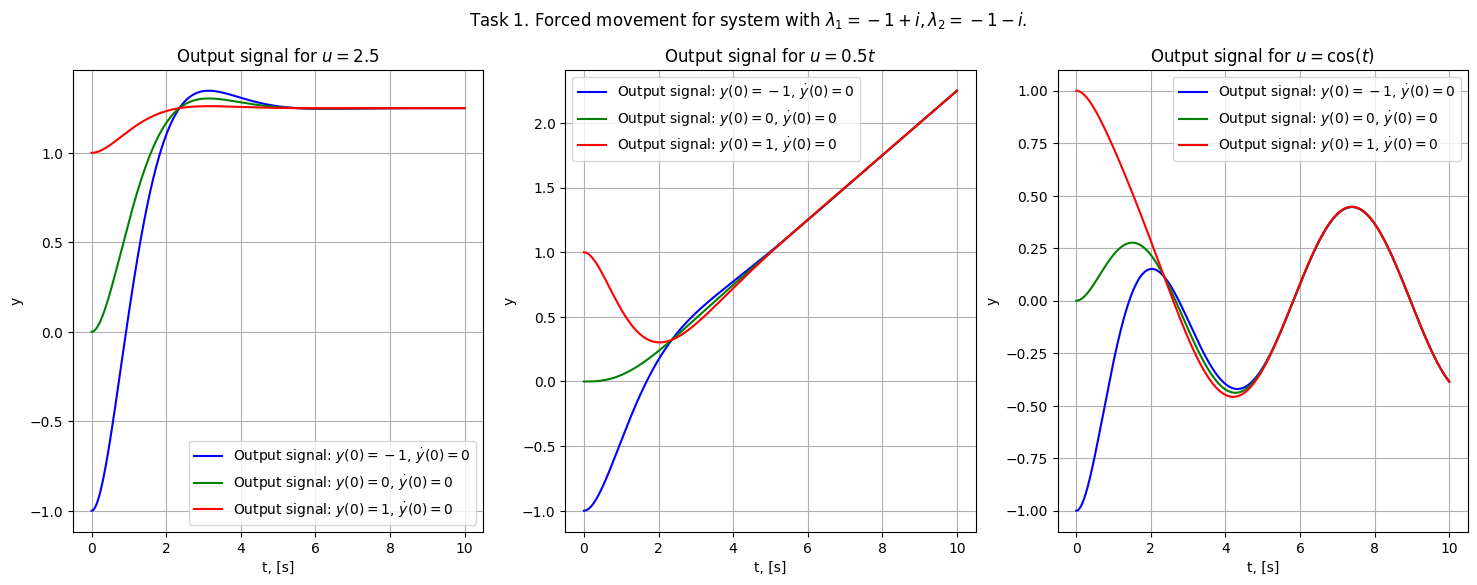

In [17]:
y_1_3 = [[], [], []]
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_3[0].append(ctrl.forced_response(state_space_1_3, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_3[1].append(ctrl.forced_response(state_space_1_3, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_3[2].append(ctrl.forced_response(state_space_1_3, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 =-1+i, \lambda_2 = -1-i$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_3[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()

## Quality of dynamic processes

In [18]:
s = sympy.symbols("s")

In [19]:
def get_process_time(y, stable, eps, time):
    for i in range(len(y)):
        if abs(y[-1-i]-stable) > eps:
            return time[-1-i]
        
    return time[0]

In [20]:
roots_1 = [
    [-0.6, -0.7, -0.8],
    [-1, -2, -2.5],
    [-5, -6 ,-7],
]

In [21]:
modeling_time_2 = 10 # sec
time_2_1 = np.linspace(0,modeling_time_2,int(modeling_time_2/dt))
u_2_1 = np.ones_like(time_2_1)

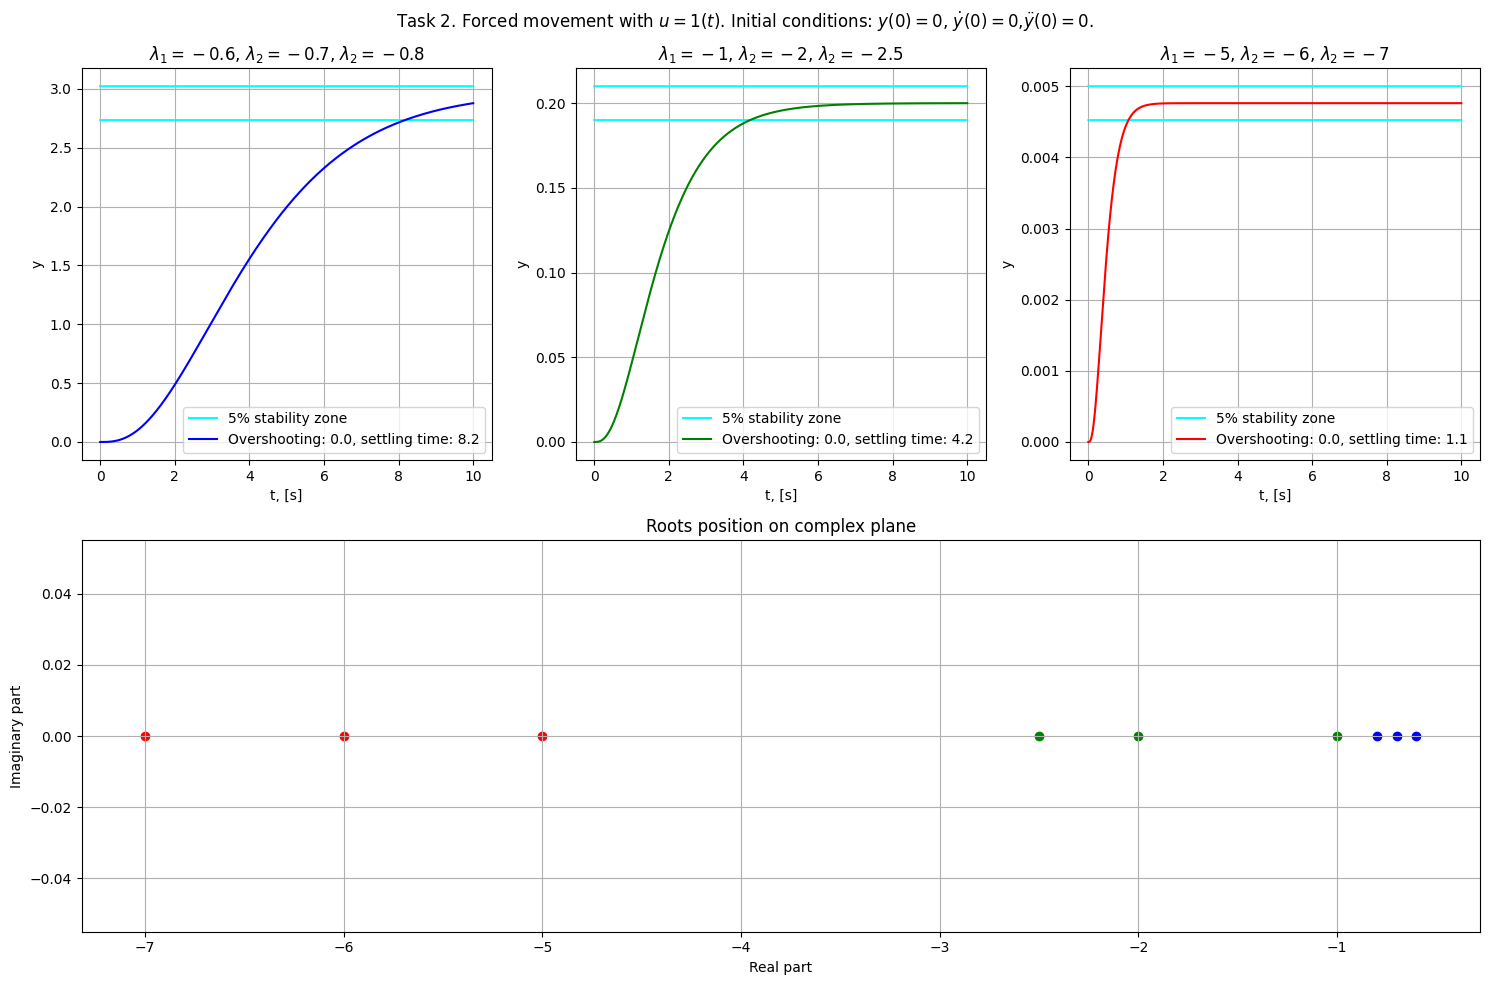

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 2. Forced movement with $u=1(t)$. Initial conditions: $y(0)=0$, $\dot y (0)=0$,$\ddot y (0)=0.$")
ax[1,0].remove()
ax[1,1].remove()
ax[1,2].remove()
gs = ax[1, 0].get_gridspec()
axbig = fig.add_subplot(gs[1, :])
for i in range(len(roots_1)):
    den = list(map(float,sympy.Poly(((s-roots_1[i][0])*(s-roots_1[i][1])*(s-roots_1[i][2])),s).coeffs()))
    tf = ctrl.tf([1], den)
    ss, _ = ctrl.canonical_form(ctrl.tf2ss(tf), form="reachable")
    y = ctrl.forced_response(ss, U=u_2_1, X0=[0,0,0], T=time_2_1).outputs
    
    stable = y[-1]
    eps = 0.05 * abs(stable)
    overshooting = (np.max(np.abs(y)) - abs(stable))/abs(stable) * 100
    t = get_process_time(y,stable,eps,time_2_1)
    
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable-eps),c="cyan",label="5% stability zone")
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable+eps),c="cyan")
    ax[0,i].plot(time_2_1, y, color[i],label=f"Overshooting: {round(overshooting,2)}, settling time: {round(t,1)}")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"$\lambda_1={roots_1[i][0]}$, $\lambda_2={roots_1[i][1]}$, $\lambda_2={roots_1[i][2]}$")
    ax[0,i].legend()

    axbig.set_title("Roots position on complex plane")
    axbig.scatter([sympy.re(roots_1[i][0]),sympy.re(roots_1[i][1]),sympy.re(roots_1[i][2])],
                    [sympy.im(roots_1[i][0]),sympy.im(roots_1[i][1]),sympy.im(roots_1[i][2])],c=color[i])
    axbig.set_ylabel("Imaginary part")
    axbig.set_xlabel("Real part")
    axbig.grid(True)
fig.tight_layout()

In [23]:
roots_2 = [
    [-1, -0.3 + sympy.I, -0.3 - sympy.I],
    [-1, -0.3 + 5 * sympy.I, -0.3 - 5 * sympy.I],
    [-1, -0.3 + 20 * sympy.I, -0.3 - 20 * sympy.I],
]

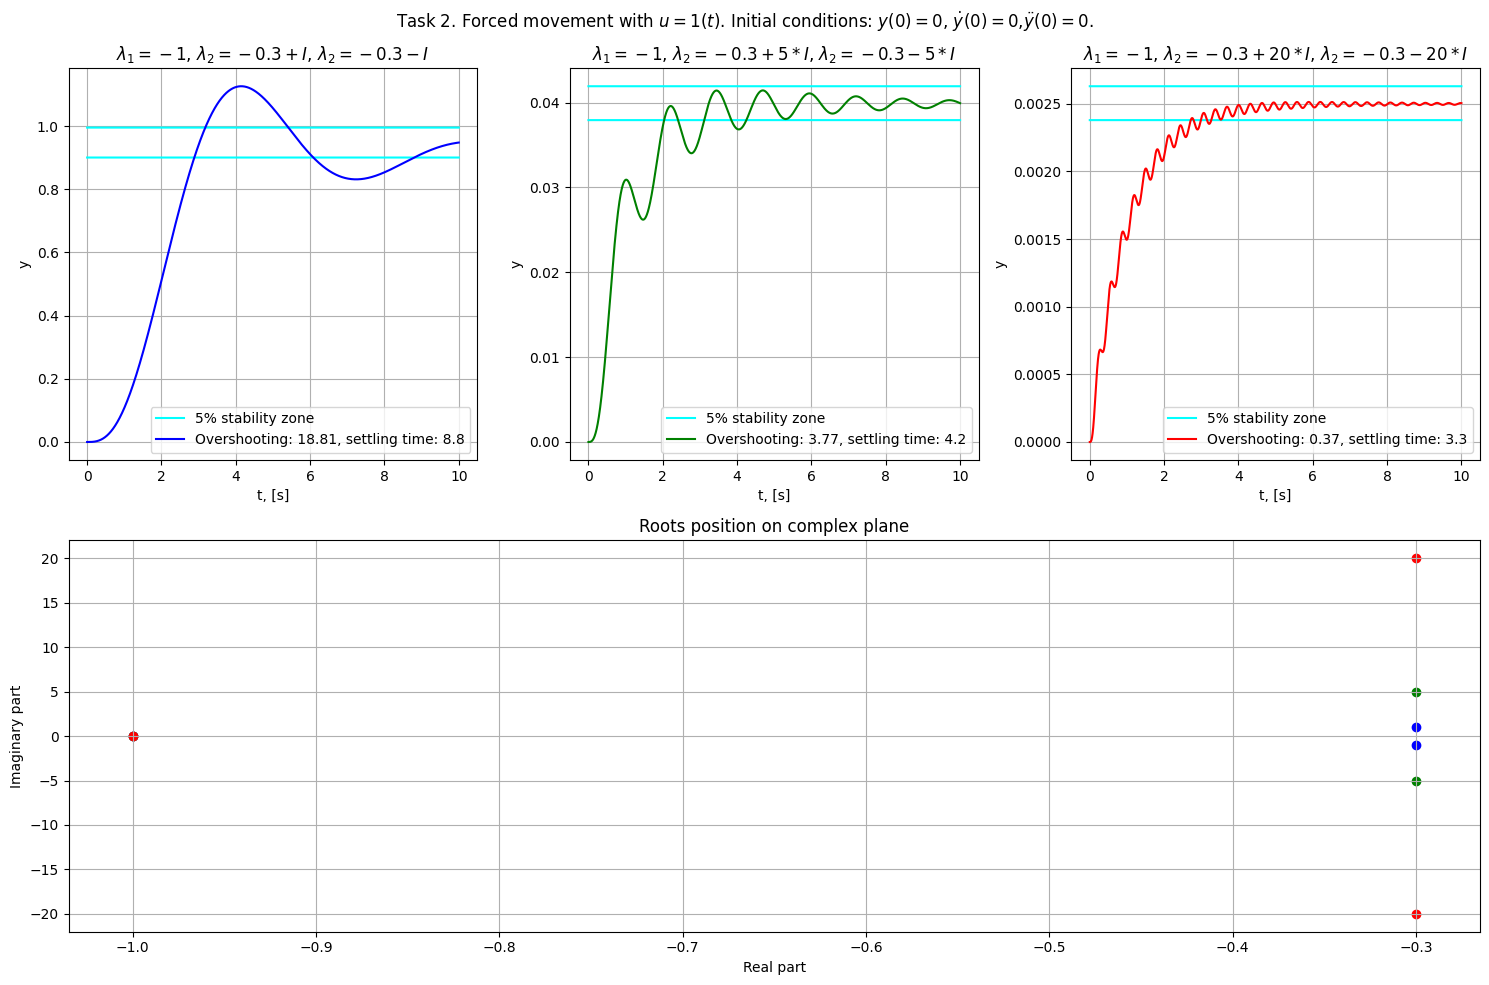

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 2. Forced movement with $u=1(t)$. Initial conditions: $y(0)=0$, $\dot y (0)=0$,$\ddot y (0)=0.$")
ax[1,0].remove()
ax[1,1].remove()
ax[1,2].remove()
gs = ax[1, 0].get_gridspec()
axbig = fig.add_subplot(gs[1, :])
for i in range(len(roots_2)):
    den = list(map(float,sympy.Poly(((s-roots_2[i][0])*(s-roots_2[i][1])*(s-roots_2[i][2])),s).coeffs()))
    tf = ctrl.tf([1], den)
    ss, _ = ctrl.canonical_form(ctrl.tf2ss(tf), form="reachable")
    y = ctrl.forced_response(ss, U=u_2_1, X0=[0,0,0], T=time_2_1).outputs
    
    stable = y[-1]
    eps = 0.05 * abs(stable)
    overshooting = (np.max(np.abs(y)) - abs(stable))/abs(stable) * 100
    t = get_process_time(y,stable,eps,time_2_1)
    
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable-eps),c="cyan",label="5% stability zone")
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable+eps),c="cyan")
    ax[0,i].plot(time_2_1, y, color[i],label=f"Overshooting: {round(overshooting,2)}, settling time: {round(t,1)}")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"$\lambda_1={roots_2[i][0]}$, $\lambda_2={roots_2[i][1]}$, $\lambda_2={roots_2[i][2]}$")
    ax[0,i].legend()

    axbig.set_title("Roots position on complex plane")
    axbig.scatter([sympy.re(roots_2[i][0]),sympy.re(roots_2[i][1]),sympy.re(roots_2[i][2])],
                    [sympy.im(roots_2[i][0]),sympy.im(roots_2[i][1]),sympy.im(roots_2[i][2])],c=color[i])
    axbig.set_ylabel("Imaginary part")
    axbig.set_xlabel("Real part")
    axbig.grid(True)
fig.tight_layout()

In [25]:
roots_3 = [
    [-0.5, -0.5 + 1 * sympy.I, -0.5 - 1 * sympy.I],
    [-5, -5 + 1 * sympy.I, -5 - 1 * sympy.I],
    [-10, -10 + 1 * sympy.I, -10 - 1 * sympy.I],
]

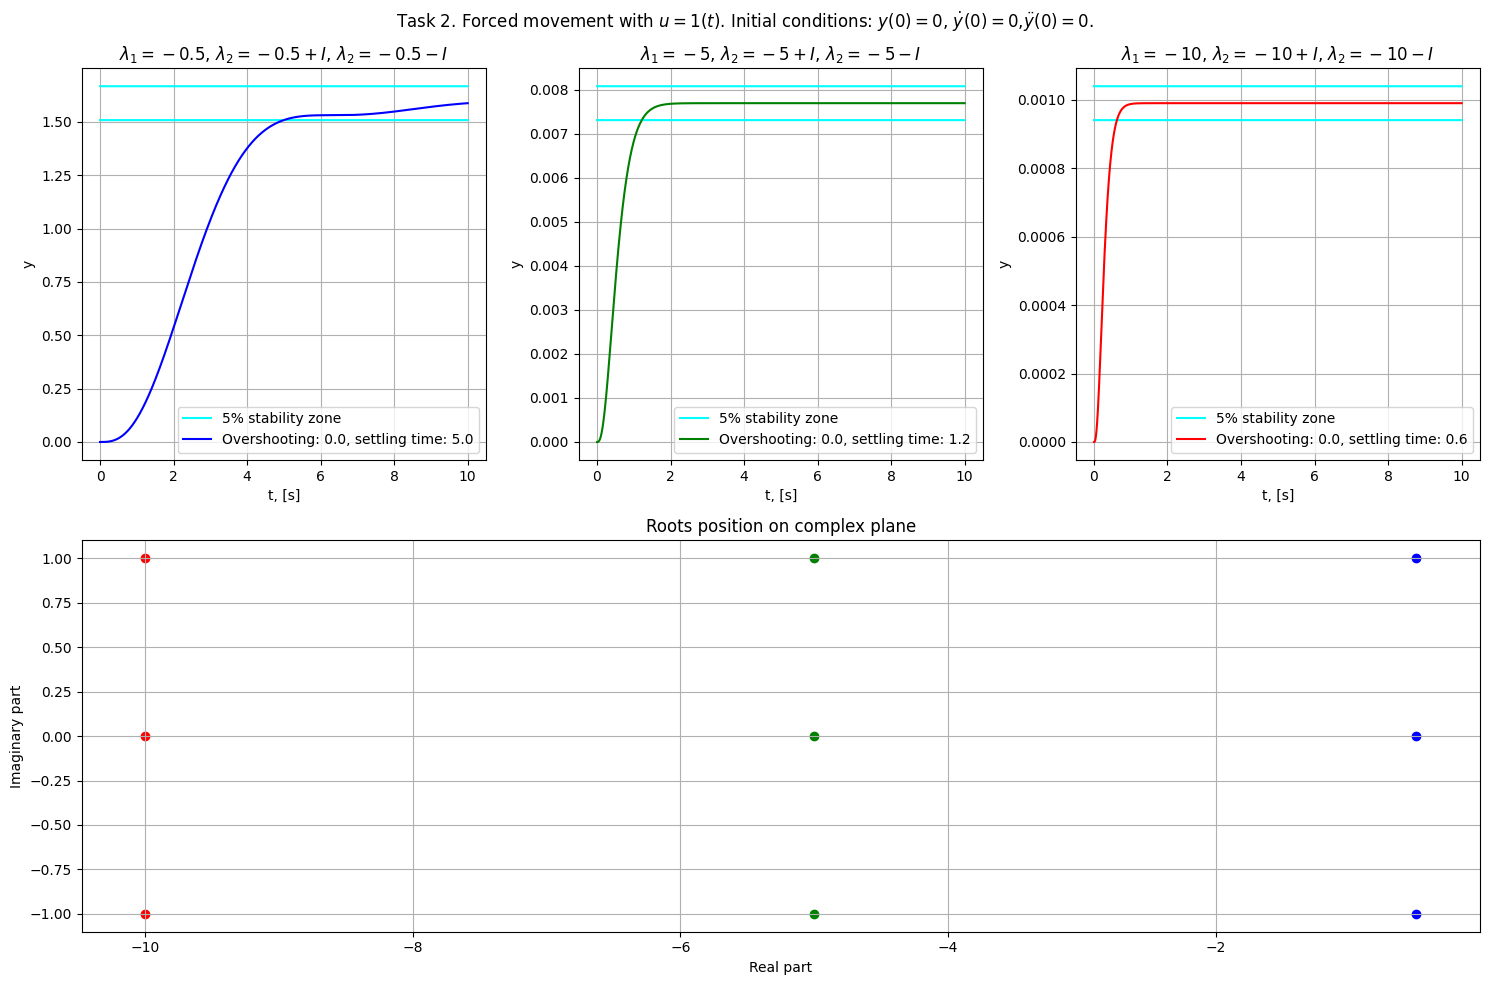

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 2. Forced movement with $u=1(t)$. Initial conditions: $y(0)=0$, $\dot y (0)=0$,$\ddot y (0)=0.$")
ax[1,0].remove()
ax[1,1].remove()
ax[1,2].remove()
gs = ax[1, 0].get_gridspec()
axbig = fig.add_subplot(gs[1, :])
for i in range(len(roots_3)):
    den = list(map(float,sympy.Poly(((s-roots_3[i][0])*(s-roots_3[i][1])*(s-roots_3[i][2])),s).coeffs()))
    tf = ctrl.tf([1], den)
    ss, _ = ctrl.canonical_form(ctrl.tf2ss(tf), form="reachable")
    y = ctrl.forced_response(ss, U=u_2_1, X0=[0,0,0], T=time_2_1).outputs
    
    stable = y[-1]
    eps = 0.05 * abs(stable)
    overshooting = (np.max(np.abs(y)) - abs(stable))/abs(stable) * 100
    t = get_process_time(y,stable,eps,time_2_1)
    
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable-eps),c="cyan",label="5% stability zone")
    ax[0,i].plot(time_2_1,np.ones_like(time_2_1)*(stable+eps),c="cyan")
    ax[0,i].plot(time_2_1, y, color[i],label=f"Overshooting: {round(overshooting,2)}, settling time: {round(t,1)}")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"$\lambda_1={roots_3[i][0]}$, $\lambda_2={roots_3[i][1]}$, $\lambda_2={roots_3[i][2]}$")
    ax[0,i].legend()

    axbig.set_title("Roots position on complex plane")
    axbig.scatter([sympy.re(roots_3[i][0]),sympy.re(roots_3[i][1]),sympy.re(roots_3[i][2])],
                    [sympy.im(roots_3[i][0]),sympy.im(roots_3[i][1]),sympy.im(roots_3[i][2])],c=color[i])
    axbig.set_ylabel("Imaginary part")
    axbig.set_xlabel("Real part")
    axbig.grid(True)
fig.tight_layout()

## Task 3 (Laplace transform)

In [27]:
W_tf = ctrl.tf([6], list(map(float,sympy.Poly((s+2)**4,s).all_coeffs())))
W_tf

TransferFunction(array([6]), array([ 1.,  8., 24., 32., 16.]))

In [28]:
t = sympy.symbols("t")

In [29]:
W = 6 / (s+2)**4
u = sympy.cos(2*t) - 2*sympy.cos(3*t)
U = sympy.laplace_transform(u, t, s)[0]

In [30]:
W_full = (W*U).simplify()
W_full

6*s*(1 - s**2)/((s + 2)**4*(s**2 + 4)*(s**2 + 9))

In [31]:
y_anal = sympy.inverse_laplace_transform(W_full,s,t)
y_anal_f = sympy.lambdify(t,y_anal,"numpy")

In [32]:
y_anal

-2241*t*exp(-2*t)*Heaviside(t)/35152 + 6*(240*sin(3*t)/28561 + 238*cos(3*t)/28561)*Heaviside(t) + 3*(35152*t**3 - 108160*t**2 - 58266*t + 46080*exp(2*t)*sin(3*t) - 85683*exp(2*t)*cos(2*t) + 45696*exp(2*t)*cos(3*t) + 39987)*exp(-2*t)*Heaviside(t)/456976 - 3*cos(2*t)*Heaviside(t)/32 + 39987*exp(-2*t)*Heaviside(t)/913952

In [33]:
TF_U = (U).simplify()
num_3 = list(map(float,sympy.Poly(sympy.fraction(TF_U)[0],s).all_coeffs()))
denum_3 = list(map(float,sympy.Poly(sympy.fraction(TF_U)[1],s).all_coeffs()))
tf_3_full = W_tf * ctrl.tf(num_3, denum_3)
tf_3_full

TransferFunction(array([-6.,  0.,  6.,  0.]), array([1.000e+00, 8.000e+00, 3.700e+01, 1.360e+02, 3.640e+02, 7.040e+02,
       1.072e+03, 1.152e+03, 5.760e+02]))

In [34]:
dt = 10**-4
modeling_time_3 = 10
time_3 = np.linspace(0,modeling_time_3,int(modeling_time_3/dt))
u_3 = np.cos(2*time_3) - 2 * np.cos(3*time_3)

In [35]:
dt_imp = 10**-5
time_3_imp = np.linspace(0,modeling_time_3,int(modeling_time_3/dt_imp))

In [36]:
y_ir_lambda = sympy.lambdify(t,sympy.inverse_laplace_transform(W,s,t),"numpy")

In [37]:
y_3_model = ctrl.forced_response(W_tf, U=u_3, X0=0, T=time_3).outputs
y_3_imp = ctrl.impulse_response(tf_3_full, T=time_3_imp).outputs
y_conv = np.convolve(y_ir_lambda(time_3), u_3)

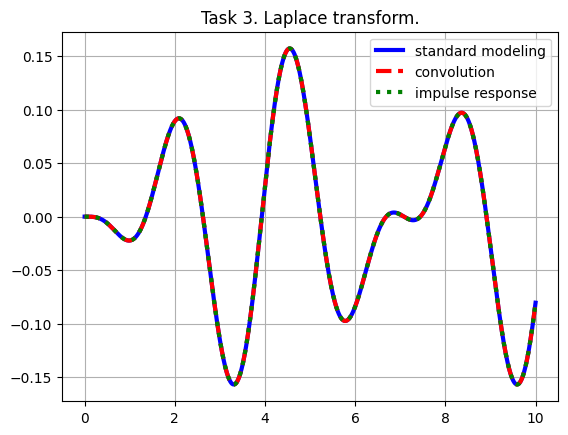

In [38]:
plt.plot(time_3, y_3_model,"b",label="standard modeling",linewidth=3)
plt.plot(time_3, y_conv[0:len(time_3)] * dt,"r--", label='convolution',linewidth=3)
plt.plot(time_3_imp, y_3_imp,"g:",label="impulse response",linewidth=3)
plt.title("Task 3. Laplace transform.")

plt.grid()
plt.legend()